## This dataset contains information on all the international football games played between 1872 and mid-2023

In [40]:
# Dataset: International football results from 1872 to 2023 BY MART JURISOO
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
warnings.filterwarnings('ignore')

data = pd.read_csv("C:/Users/pc/OneDrive/Documents/Jupyter Projects/international_results.csv")
pd.set_option('display.max_columns', None)
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [41]:
def dataframe_info(df):
    temp = pd.DataFrame(index=df.columns)
    temp["Datatype"] = df.dtypes
    temp["Not null values"] = df.count()
    temp["Null values"] = df.isnull().sum()
    temp["Percentage of Null values"] = (df.isnull().mean())*100
    temp["Unique count"] = df.nunique()
    return temp
dataframe_info(data)

,Datatype,Not null values,Null values,Percentage of Null values,Unique count
date,object,44934,0,0.0,15627
home_team,object,44934,0,0.0,312
away_team,object,44934,0,0.0,307
home_score,int64,44934,0,0.0,26
away_score,int64,44934,0,0.0,22
tournament,object,44934,0,0.0,146
city,object,44934,0,0.0,2033
country,object,44934,0,0.0,268
neutral,bool,44934,0,0.0,2


In [42]:
data['date'] = data['date'].astype('datetime64')
print(data['date'].dtype)

datetime64[ns]


# Questions
### 1. Who is the best team of all time?
### 2. Which teams dominated different eras of football?
### 3. What trends have there been in international football throughout the ages? (Home advantage?, total goals scored?, distribution of team' strength?)
### 4. Can we say anything about geopolitics from football fixtures? (How has the number of countries changed?, which teams like to play each other?)
### 5. Which countries host the most matches where they themselves are not participating in?
### 6. Which teams are the most active in playing friendlies, does it help or hurt them?

## 1. Who is the best team of all time?

In [43]:
# We'll create a new column 'winner', which will return the name of the winning team, and NaN if the outcome was a draw
winner = []

for index, row in data.iterrows():
    if row['home_score'] > row['away_score']:
        winner.append(row['home_team'])
    elif row['home_score'] < row['away_score']:
        winner.append(row['away_team'])
    else:
        winner.append(np.nan)

data['winner'] = winner
print(data.head())

        date home_team away_team  home_score  away_score tournament     city  \
0 1872-11-30  Scotland   England           0           0   Friendly  Glasgow   
1 1873-03-08   England  Scotland           4           2   Friendly   London   
2 1874-03-07  Scotland   England           2           1   Friendly  Glasgow   
3 1875-03-06   England  Scotland           2           2   Friendly   London   
4 1876-03-04  Scotland   England           3           0   Friendly  Glasgow   

    country  neutral    winner  
0  Scotland    False       NaN  
1   England    False   England  
2  Scotland    False  Scotland  
3   England    False       NaN  
4  Scotland    False  Scotland  


In [44]:
print(data['winner'].value_counts().head())

Brazil       659
England      602
Germany      576
Argentina    561
Sweden       523
Name: winner, dtype: int64


#### It appears that since 1872, Brazil has won the most out of any nation to have played international football

## 2. Which teams dominated different eras of football?

In [45]:
# Isolate the year from the date
data['year'] = data['date'].dt.year
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,NaN,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,NaN,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,1876


In [46]:
# Create a decade column 
data['decade'] = (data['year']//10)*10
print(data['decade'].head())

0    1870
1    1870
2    1870
3    1870
4    1870
Name: decade, dtype: int64


In [47]:
# Using groupby, find the most common 'winner' for each decade 
data.groupby('decade')['winner'].agg(pd.Series.mode)

decade
1870         Scotland
1880         Scotland
1890          England
1900          England
1910        Argentina
1920           Sweden
1930          Germany
1940        Argentina
1950           Brazil
1960           Brazil
1970      South Korea
1980      South Korea
1990           Brazil
2000     Saudi Arabia
2010           Mexico
2020    United States
Name: winner, dtype: object

#### Alternate method...

In [48]:
# groupby 'winner' again but apply the value_count function instead of mode
grouped = data.groupby('decade').agg({'winner':'value_counts'})
grouped
# The highest winning team will be first row for each decade

winner
decade winner                              
1870   Scotland                           8
       England                            3
1880   Scotland                          23
       England                           16
       Wales                              8
...                                     ...
2020   Raetia                             1
       Sri Lanka                          1
       Timor-Leste                        1
       United States Virgin Islands       1
       Vanuatu                            1

[1814 rows x 1 columns]

In [49]:
# Can't reset index until you either change the 'winner' column name or drop it, because it shares the same name as the 'winner' index column 
# We'll drop it because we don't need it
# Reset the index to make the index's columns, again groupby 'decade' and select the first row using head(1)
groupedfinal = grouped.drop(columns='winner').reset_index().groupby('decade').head(1)
groupedfinal

,decade,winner
0,1870,Scotland
2,1880,Scotland
8,1890,England
12,1900,England
27,1910,Argentina
50,1920,Sweden
114,1930,Germany
182,1940,Argentina
266,1950,Brazil
376,1960,Brazil


#### Now we can see which nations won the most games in each decade....

## 3. What trends have there been in international football throughout the ages? (Home advantage?, total goals scored?)

### Home advantage over time 

In [50]:
# Create new columns 'home_winner', assign a 1 if the home_team was also the winning team, and 0 if it was not, repeat for 'away_winner'
data['home_winner'] = np.where(data['home_team'] == data['winner'], 1, 0)
data['away_winner'] = np.where(data['away_team'] == data['winner'], 1, 0)

data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,year,decade,home_winner,away_winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,NaN,1872,1870,0,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,1873,1870,1,0
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,1874,1870,1,0
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,NaN,1875,1870,0,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,1876,1870,1,0


In [51]:
home_wins = data.groupby('decade').agg({'home_winner':'sum'})

games = data.groupby('decade').agg({'date':'count'})

home_wins = pd.DataFrame(home_wins)
games = pd.DataFrame(games)
home_wins = home_wins.reset_index()
games = games.reset_index()
merged = home_wins.merge(games, on='decade', how='inner')
merged.rename(columns={'date':'total games'},inplace=True)

merged['home_perc'] = merged['home_winner']/merged['total games']
merged.rename(columns={'decade':'Decade', 'home_winner':'Total home wins', 'total games':'Total games', 'home_perc':'Home win rate'}, inplace=True)
print(merged)


    Decade  Total home wins  Total games  Home win rate
0     1870                8           13       0.615385
1     1880               27           55       0.490909
2     1890               30           59       0.508475
3     1900               56          124       0.451613
4     1910              145          283       0.512367
5     1920              357          729       0.489712
6     1930              519         1010       0.513861
7     1940              420          804       0.522388
8     1950              765         1576       0.485406
9     1960             1441         2810       0.512811
10    1970             1954         3924       0.497961
11    1980             2231         4797       0.465082
12    1990             3275         6623       0.494489
13    2000             4603         9459       0.486626
14    2010             4673         9794       0.477129
15    2020             1378         2874       0.479471


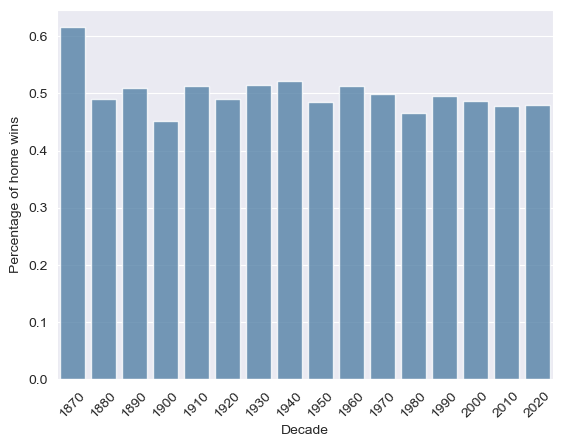

In [52]:
sns.set_style('darkgrid')
sns.barplot(x='Decade', y='Home win rate', data=merged, alpha=0.8, color='steelblue')
plt.ylabel('Percentage of home wins')
plt.xlabel('Decade')
plt.xticks(rotation=45)
plt.show()

#### Percentage of home wins has remained relatively the same throughout the years

### Total goals scored

In [53]:
data['total_goals'] = data['home_score'] + data['away_score']
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,year,decade,home_winner,away_winner,total_goals
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,NaN,1872,1870,0,0,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,1873,1870,1,0,6
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,1874,1870,1,0,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,NaN,1875,1870,0,0,4
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,1876,1870,1,0,3


    Decade  Total goals
0     1870           59
1     1880          307
2     1890          304
3     1900          517
4     1910         1134
5     1920         2797
6     1930         4302
7     1940         3453
8     1950         6274
9     1960         9746
10    1970        11598
11    1980        11961
12    1990        18127
13    2000        26437
14    2010        26496
15    2020         7596


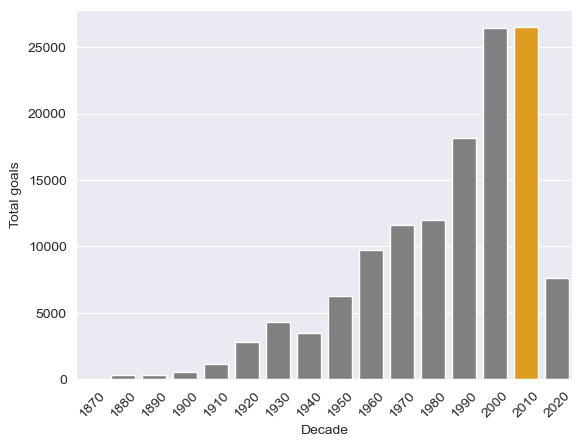

In [54]:
total_goals = data.groupby('decade').agg({'total_goals':'sum'}).reset_index()
total_goals.rename(columns={'decade':'Decade', 'total_goals':'Total goals'},inplace=True)
print(total_goals)
cols = ['orange' if x == total_goals['Total goals'].max() else 'grey' for x in total_goals['Total goals']]
sns.barplot(x='Decade', y='Total goals', data=total_goals, palette=cols)
plt.xticks(rotation=45)
plt.show()

#### Can see on a baseline level, the number of goals scored has been increasing throughout the years and that the 2010's was the decade that saw the highest goal tally. But how about the number of goals per game?

    Decade  Total goals  total games  goals_per_game
0     1870           59           13        4.538462
1     1880          307           55        5.581818
2     1890          304           59        5.152542
3     1900          517          124        4.169355
4     1910         1134          283        4.007067
5     1920         2797          729        3.836763
6     1930         4302         1010        4.259406
7     1940         3453          804        4.294776
8     1950         6274         1576        3.980964
9     1960         9746         2810        3.468327
10    1970        11598         3924        2.955657
11    1980        11961         4797        2.493433
12    1990        18127         6623        2.736977
13    2000        26437         9459        2.794904
14    2010        26496         9794        2.705330
15    2020         7596         2874        2.643006


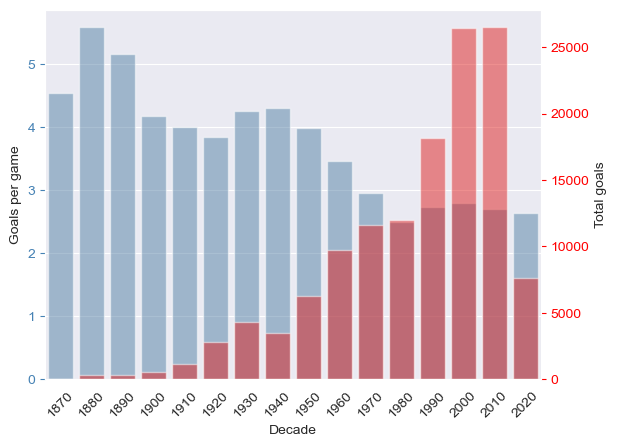

In [55]:
games = data.groupby('decade').agg({'date':'count'})

total_goals = pd.DataFrame(total_goals)
games = pd.DataFrame(games)
games = games.reset_index()
games.rename(columns={'decade':'Decade'},inplace=True)

merged3 = total_goals.merge(games, on='Decade', how='inner')

merged3.rename(columns={'date':'total games'}, inplace=True)

merged3['goals_per_game'] = merged3['Total goals']/merged3['total games']

print(merged3)

fig, ax = plt.subplots()
sns.barplot(x='Decade', y='goals_per_game', data=merged3, color='steelblue', alpha=0.5, ax=ax)
ax.set_xlabel('Decade')
ax.set_ylabel('Goals per game')
ax.set_xticklabels(merged3['Decade'], rotation=45)
ax.tick_params('y', colors='steelblue')
ax2 = ax.twinx()
sns.barplot(x='Decade', y='Total goals', data=total_goals, color = 'red', alpha=0.5, ax = ax2)
ax2.set_ylabel('Total goals') 
ax2.tick_params('y', colors='red')
ax2.grid(None) # Align the grid
plt.show()


#### It appears that though the number of goals scored has increased throughout the years, the number of goals per game has decreased

## 4. Can we say anything about geopolitics from football fixtures? (How has the number of countries changed?, which teams like to play each other?)

### How has the number of countries changed?

In [56]:
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,year,decade,home_winner,away_winner,total_goals
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,NaN,1872,1870,0,0,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,1873,1870,1,0,6
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,1874,1870,1,0,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,NaN,1875,1870,0,0,4
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,1876,1870,1,0,3


    Decade  No. of countries
0     1870                 3
1     1880                 5
2     1890                 4
3     1900                15
4     1910                25
5     1920                57
6     1930                67
7     1940                85
8     1950               112
9     1960               144
10    1970               158
11    1980               174
12    1990               209
13    2000               220
14    2010               220
15    2020               192


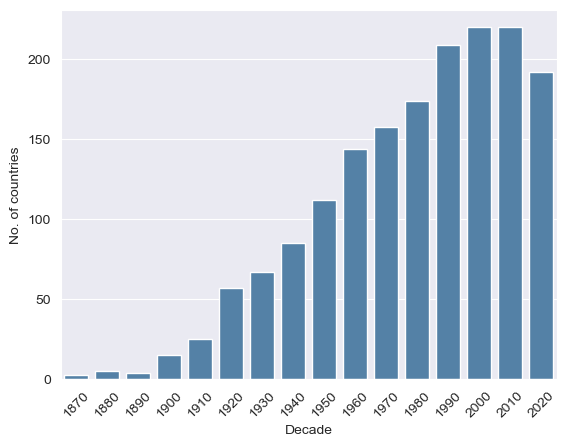

In [57]:
countries = data.groupby('decade').agg({'country':'nunique'}).reset_index()
countries.rename(columns={'decade':'Decade','country':'No. of countries'}, inplace=True)
print(countries)


ax = plt.subplots()
ax = sns.barplot(x='Decade', y='No. of countries', data=countries, color='steelblue')
ax.set_xticklabels(countries['Decade'], rotation=45)
plt.show()

#### No. of countries in which games are played have increased over time

### Which teams like to play each other?

In [58]:
data[['home_team','away_team']].value_counts()
# The problem here is that using value_counts counts every permutation and not every combination

home_team    away_team
Argentina    Uruguay      98
Uruguay      Argentina    81
Austria      Hungary      69
Hungary      Austria      68
Kenya        Uganda       66
                          ..
Philippines  India         1
             Hong Kong     1
Georgia      Romania       1
Philippines  Fiji          1
Abkhazia     Artsakh       1
Length: 11523, dtype: int64

In [59]:
# To sort this out
np.sort(data[['home_team','away_team']]) # User np.sort
# Its similar to np.array in the sense that it creates a 2D Numpy array
# But np.sort will arange the values in the rows so that they're in alphabetical or numerical order
# Essetially making it so that for two teams, a teams name will always be on the same column 

array([['England', 'Scotland'],
       ['England', 'Scotland'],
       ['England', 'Scotland'],
       ...,
       ['Andorra', 'Switzerland'],
       ['Belarus', 'Israel'],
       ['Kosovo', 'Romania']], dtype=object)

In [60]:
# Then all we do is convert that 2D Numpy array to a dataframe and apply the value counts function again 
pd.DataFrame(np.sort(data[['home_team','away_team']]), columns=['Home_team', 'Away_team']).value_counts()

Home_team   Away_team     
Argentina   Uruguay           179
Austria     Hungary           137
Belgium     Netherlands       127
England     Scotland          118
Kenya       Uganda            110
                             ... 
Frøya       Åland Islands       1
Costa Rica  Czechoslovakia      1
Gabon       Gambia              1
Costa Rica  Czech Republic      1
Luxembourg  Myanmar             1
Length: 7098, dtype: int64

#### Argentina and Uruguay have played each other the most out of any team since 1872

## 5. Which countries host the most matches where they themselves are not participating in?

In [61]:
# First lets filter for rows where the host country is neither the home_team nor the away_team 
filtered = data[(data['country'] != data['home_team']) & (data['country'] != data['away_team'])]
filtered

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,year,decade,home_winner,away_winner,total_goals
19,1882-02-18,Northern Ireland,England,0,13,Friendly,Belfast,Ireland,False,England,1882,1880,0,1,13
28,1883-03-17,Northern Ireland,Wales,1,1,Friendly,Belfast,Ireland,False,NaN,1883,1880,0,0,2
29,1884-01-26,Northern Ireland,Scotland,0,5,British Home Championship,Belfast,Ireland,False,Scotland,1884,1880,0,1,5
31,1884-02-23,Northern Ireland,England,1,8,British Home Championship,Belfast,Ireland,False,England,1884,1880,0,1,9
40,1885-04-11,Northern Ireland,Wales,2,8,British Home Championship,Belfast,Ireland,False,Wales,1885,1880,0,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44912,2023-09-12,Japan,Turkey,4,4,Friendly,Genk,Belgium,True,NaN,2023,2020,0,0,8
44914,2023-09-12,South Korea,Saudi Arabia,1,0,Friendly,Newcastle,England,True,South Korea,2023,2020,1,0,1
44915,2023-09-12,Mexico,Uzbekistan,3,3,Friendly,Atlanta,United States,True,NaN,2023,2020,0,0,6
44916,2023-09-12,Morocco,Burkina Faso,1,0,Friendly,Lens,France,True,Morocco,2023,2020,1,0,1


In [62]:
# Applying the value_counts function we can see which countries host the most games in which they themselves are not playing 
filtered['country'].value_counts()

United States           899
Malaysia                474
France                  384
Qatar                   372
United Arab Emirates    326
                       ... 
Montserrat                1
Bohemia and Moravia       1
Lautoka                   1
Belgian Congo             1
Brunei                    1
Name: country, Length: 240, dtype: int64

#### The United States hosts the most games in which they themselves are not playing

## 6. Which teams are the most active in playing friendlies, does it help or hurt them?

In [63]:
# We'll create a new column 'Friendly' to tell us which games are Friendly and which are Non-Friendly
data['Friendly'] = np.where(data['tournament'].str.contains('Friendly'), 'Friendly', 'Non-Friendly')

In [64]:
# Subset the data for only friendly games 
friendly = data[data['Friendly'] == 'Friendly']
friendly

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,year,decade,home_winner,away_winner,total_goals,Friendly
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,NaN,1872,1870,0,0,0,Friendly
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,1873,1870,1,0,6,Friendly
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,1874,1870,1,0,3,Friendly
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,NaN,1875,1870,0,0,4,Friendly
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,1876,1870,1,0,3,Friendly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44919,2023-09-12,Senegal,Algeria,0,1,Friendly,Diamniadio,Senegal,False,Algeria,2023,2020,0,1,1,Friendly
44920,2023-09-12,Singapore,Taiwan,3,1,Friendly,Bishan,Singapore,False,Singapore,2023,2020,1,0,4,Friendly
44921,2023-09-12,South Africa,DR Congo,1,0,Friendly,Johannesburg,South Africa,False,South Africa,2023,2020,1,0,1,Friendly
44922,2023-09-12,United Arab Emirates,Costa Rica,4,1,Friendly,Zagreb,Croatia,True,United Arab Emirates,2023,2020,1,0,5,Friendly


In [65]:
# Now we'll count how many friendly games each nation has played
all_friendly_games = pd.concat([friendly['home_team'],friendly['away_team']]).value_counts()
all_friendly_games = pd.DataFrame(all_friendly_games, columns=['No. of friendly games'])
print(all_friendly_games)
# While we're at it we'll calculate the mean number of friendly games teams have played for when we filter later
mean = all_friendly_games['No. of friendly games'].mean()
print(mean)

              No. of friendly games
Germany                         584
Hungary                         573
Sweden                          552
Poland                          534
France                          491
...                             ...
Ellan Vannin                      1
Surrey                            1
Panjab                            1
Somaliland                        1
Saint Helena                      1

[264 rows x 1 columns]
134.13636363636363


#### Germany has played the most friendly games

In [66]:
# Out of the friendly games played, how many has each team won? 
friendly_wins = pd.DataFrame(friendly['winner'].value_counts())
friendly_wins.rename(columns={'winner':'Friendlies won'}, inplace=True)
friendly_wins 

,Friendlies won
Germany,309
Brazil,297
Hungary,268
Sweden,252
England,232
...,...
United States Virgin Islands,1
Northern Mariana Islands,1
Micronesia,1
Greenland,1


#### Germany has also won the most friendly games

### Does friendly games help or hurt the team?

In [67]:
merged = all_friendly_games.merge(friendly_wins, left_index=True, right_index=True, how='left')
merged = merged.fillna(0)
merged['Friendlies won'] = merged['Friendlies won'].astype(int)
merged

,No. of friendly games,Friendlies won
Germany,584,309
Hungary,573,268
Sweden,552,252
Poland,534,218
France,491,218
...,...,...
Ellan Vannin,1,0
Surrey,1,1
Panjab,1,0
Somaliland,1,0


In [68]:
# Calculate the win rate of each teams friendly games
merged['Friendly win rate'] = merged['Friendlies won'] / merged['No. of friendly games']
# Filter the data for only teams who have played more friendly games than the mean number of friendly games played amongst all teams
merged_filtered = merged[merged['No. of friendly games'] > mean]
merged_filtered = merged_filtered.sort_values('Friendly win rate')
merged_filtered

,No. of friendly games,Friendlies won,Friendly win rate
Luxembourg,156,18,0.115385
El Salvador,231,52,0.225108
Bolivia,158,36,0.227848
Malta,154,36,0.233766
Lithuania,160,39,0.243750
...,...,...,...
Germany,584,309,0.529110
Argentina,370,196,0.529730
Spain,342,182,0.532164
England,420,232,0.552381


In [69]:
# Now that we have the no. of games, no. of wins, and the win rate for friendly games, we'll now do the same for non friendly games
non_friendly = data[data['Friendly'] != 'Friendly']

all_non_friendly_games = pd.concat([non_friendly['home_team'], non_friendly['away_team']]).value_counts()
all_non_friendly_games = pd.DataFrame(all_non_friendly_games, columns=['No. of non friendly games'])
print(all_non_friendly_games)

non_friendly_wins = pd.DataFrame(non_friendly['winner'].value_counts())
non_friendly_wins.rename(columns={'winner':'Non friendlies won'}, inplace=True)
print(friendly_wins) 

merged2 = all_non_friendly_games.merge(non_friendly_wins, left_index=True, right_index=True, how='left')
merged2 = merged2.fillna(0)
merged2['Non friendlies won'] = merged2['Non friendlies won'].astype(int)
print(merged2)

merged2['Non friendlies win rate'] = merged2['Non friendlies won']/merged2['No. of non friendly games']
print(merged2)

                    No. of non friendly games
Argentina                                 658
England                                   635
Uruguay                                   605
South Korea                               604
Brazil                                    594
...                                       ...
Parishes of Jersey                          2
Maule Sur                                   2
Ticino                                      1
Kernow                                      1
Yorkshire                                   1

[302 rows x 1 columns]
                              Friendlies won
Germany                                  309
Brazil                                   297
Hungary                                  268
Sweden                                   252
England                                  232
...                                      ...
United States Virgin Islands               1
Northern Mariana Islands                   1
Micronesia         

In [70]:
# Now we have a new dataframe for each countries performance in friendly and non friendly games 
alltogether = merged_filtered.merge(merged2, left_index=True, right_index=True, how='left')
alltogether

,No. of friendly games,Friendlies won,Friendly win rate,No. of non friendly games,Non friendlies won,Non friendlies win rate
Luxembourg,156,18,0.115385,283,28,0.098940
El Salvador,231,52,0.225108,334,133,0.398204
Bolivia,158,36,0.227848,340,74,0.217647
Malta,154,36,0.233766,280,23,0.082143
Lithuania,160,39,0.243750,244,67,0.274590
...,...,...,...,...,...,...
Germany,584,309,0.529110,409,267,0.652812
Argentina,370,196,0.529730,658,365,0.554711
Spain,342,182,0.532164,397,248,0.624685
England,420,232,0.552381,635,370,0.582677


In [71]:
alltogether = alltogether.sort_values('No. of friendly games')
alltogether

,No. of friendly games,Friendlies won,Friendly win rate,No. of non friendly games,Non friendlies won,Non friendlies win rate
Barbados,137,42,0.306569,145,49,0.337931
Angola,137,41,0.299270,250,90,0.360000
Slovakia,137,47,0.343066,197,86,0.436548
Croatia,140,70,0.500000,225,122,0.542222
Congo,140,44,0.314286,249,84,0.337349
...,...,...,...,...,...,...
France,491,218,0.443992,395,229,0.579747
Poland,534,218,0.408240,325,152,0.467692
Sweden,552,252,0.456522,509,271,0.532417
Hungary,573,268,0.467714,399,189,0.473684


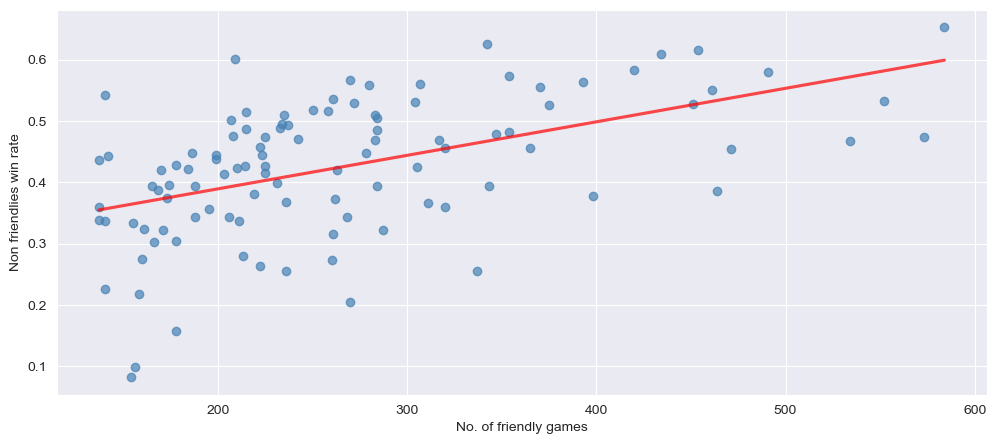

0.5110614411731049

In [78]:
# We'll now see how the no. of friendly games played correlates to the win rate of non friendly games
fig, ax = plt.subplots(figsize=(12,5))
sns.regplot(x='No. of friendly games', y='Non friendlies win rate', data=alltogether, ax=ax, ci=None, scatter_kws={'color':'steelblue', 'alpha': 0.7}, line_kws={'color':'red', 'alpha':0.7})
plt.show()

alltogether['No. of friendly games'].corr(alltogether['Non friendlies win rate'])

#### There is a positive correlation between the no. of friendly games played, and the win rate in non friendly games meaning that friendly games do indeed help a teams performance in a tournament setting.